(66, 200, 3)
0.246103
25056
25056


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.00000000e+00,
        

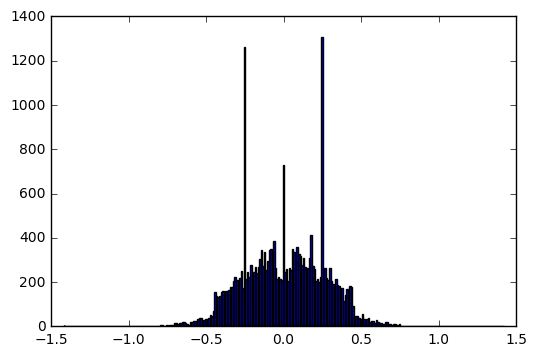

In [4]:
import argparse
import cv2
import os
import sys
import csv
import base64
import numpy as np
import matplotlib.pyplot as plt
# TODO: Build a model
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers import AveragePooling2D, Conv2D, Lambda, ELU
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from sklearn.utils import shuffle

inp_shape = (160, 320, 3) 

path = "/home/lakshmi/training data udacity/data/"
csv_path = path + "driving_log.csv"

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def trans_image(image,steer,trans_range):
    rows, cols = 66,200
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    #tr_y = 40*np.random.uniform()-40/2
    tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,steer_ang


def crop_camera1(img, crop_height=66, crop_width=200):
    height = img.shape[0]
    width = img.shape[1]

    # y_start = 60+random.randint(-10, 10)
    y_start = 60
    x_start = int(width/2)-int(crop_width/2)
    return img[y_start:y_start+crop_height, x_start:x_start+crop_width]


def load_image(data_line, j):
    img = plt.imread(path + data_line[j].strip())
    img = crop_camera1(img)
    y = float(data_line[3])
    return img, y

def random_load_image(data):
    j = np.random.randint(4)  
    if j == 0 or j==3 :
      j = 0
    img, y = load_image(data, j)   
    if j == 1: 
     y = y + 0.25
    if j == 2: 
     y = y - 0.25
    return img, y

def add_image_to_set(img, y): 
    skip = 0
    rand = np.random.randint(100) 
    if abs( y ) == 0.0 and rand < 80 :
     skip = 1
    else:
     features.append(img)
     labels.append(y)
    return skip

def augment_data(img, y):
     img , y = trans_image(img, y ,100)
     labels.append(y)
     features.append(img)
     
     image = cv2.flip(img, 1)
     features.append(image)
     labels.append(-y)
     
     image = augment_brightness_camera_images(img)
     features.append(image)
     labels.append(y)
    

features = []
labels = []

with open(csv_path) as F:
  reader = csv.reader(F)
  for data in reader:
    img, y = random_load_image(data)
    skip = add_image_to_set(img,y)
    if skip == 1:
      continue
    else:
      #x = 0
      augment_data(img, y)
 
      
features = np.asarray(features)
labels = np.asarray(labels, dtype=np.float32)
features, labels = shuffle(features, labels)
features, labels = shuffle(features, labels)

print(features[20].shape)
print(labels[20])
print(len(features))
print(len(labels))


import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(labels, bins=np.arange(labels.min(), labels.max()+0.01, 0.01))


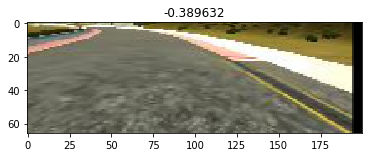

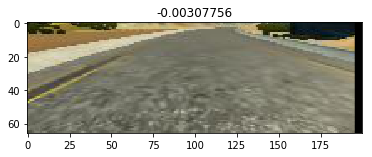

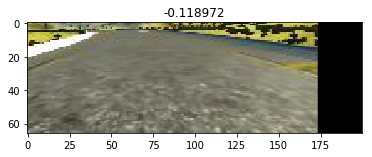

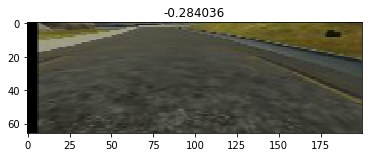

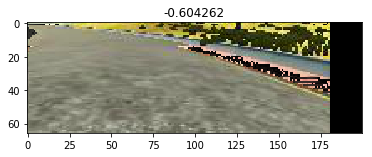

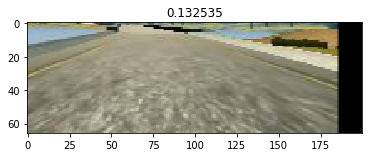

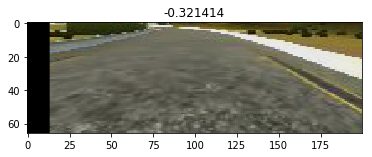

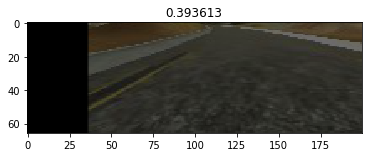

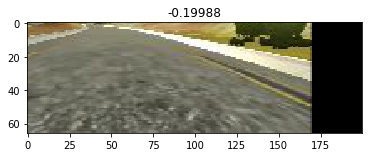

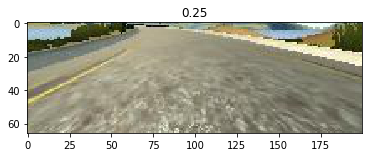

In [3]:

for i in range(10):
        rand = np.random.randint(100) 
        plt.figure()
        plt.title(labels[rand])
        plt.imshow(features[rand])

In [ ]:

def train_generator(batch_size):

   start = 0
   end = start + batch_size
   n = len(labels)
   while True:
     start += batch_size
     end += batch_size
     if start >= n:
       start = 0
       end = batch_size
     #print(' ', start,end)
     yield(shuffle(features[start:end], labels[start:end]))
 
ch, row, col = 3, 66, 200

model = Sequential()


def process(img):
        import tensorflow as tf
        # img = tf.image.rgb_to_grayscale(img)
        img = tf.image.resize_images(img, (66, 200))
        return img

model.add(Lambda(process, input_shape=(row, col, ch)))

model.add(Lambda(lambda  x: x/255.-0.5))
                     #  input_shape=(ch, row, col),
                     #  output_shape=(ch, row, col)))
                     #input_shape=(row, col, ch),
                     #output_shape=(row, col, ch)))
model.add(Convolution2D(24, 5, 5, border_mode='same', subsample=(2,2), activation='elu'))
model.add(Dropout(.2))

model.add(Convolution2D(36, 5, 5,  border_mode='same',  subsample=(2,2), activation='elu'))
model.add(Dropout(.2))

model.add(Convolution2D(48, 5, 5,  border_mode='valid',  subsample=(2,2), activation='elu'))
model.add(Dropout(.2))

model.add(Convolution2D(64, 3, 3,  border_mode='valid',  activation='elu'))
model.add(Dropout(.2))

model.add(Convolution2D(64, 3, 3,  border_mode='valid',  activation='elu'))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1164, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.summary()
#Compile and train the model
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001))
             # metrics=['accuracy'])
no_samples_per_epoch = len(labels) - 64

history = model.fit_generator(train_generator(64), samples_per_epoch=no_samples_per_epoch, nb_epoch=4)


import json
import os
import h5py

# Save model as json file
json_string = model.to_json()
with open('model.json', 'w') as outfile:
    json.dump(json_string, outfile)
    # save weights
    model.save_weights('./model.h5')
    print("Saved")


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, 66, 200, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 33, 100, 24)   1824        lambda_2[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 33, 100, 24)   0           convolution2d_1[0][0]            
___________________________________________________________________________________________

/home/lakshmi/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/topology.py:1811: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_1_model" was not an Input tensor, it was generated by layer lambda_1.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: lambda_input_1:0
  str(x.name))


Epoch 1/4
24832/24992 [============================>.] - ETA: 1s - loss: 0.0940  